# 2. Kreuzvalidierung und Modellselektion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext version_information

a) Erzeugen Sie zunächst 3 Sätze und trainieren Sie für jeden Satz eine SVM mit gamma = 0.0001 und C = 1 und und geben Sie jeweils die Treffergenauigkeit für Trainings- und Testdatensatz aus. Die Ergebnisse sollten ähnlich wie in Aufgabe 1b aussehen.

In [2]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

# Lade Beispiel-Datensatz (hier: Digits Datensatz)
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Definiere SVM-Modell mit den gegebenen Parametern
svm_model = SVC(gamma=0.001, C=1.0)

# Erzeuge einen ShuffleSplit-Splitter
shuffle_splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

# Iteriere ueber die Splits und trainiere die SVM fuer jeden Split
for train_index, test_index in shuffle_splitter.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Trainiere das SVM-Modell
    svm_model.fit(X_train, y_train)

    # Berechne und gib die Treffergenauigkeit fuer Trainings- und Testdatensatz aus
    train_accuracy = svm_model.score(X_train, y_train)
    test_accuracy = svm_model.score(X_test, y_test)

    print(f'Trainingsdaten Treffergenauigkeit: {train_accuracy:.6f}')
    print(f'Testdatensatz Treffergenauigkeit: {test_accuracy:.6f}')
    print('---')

Trainingsdaten Treffergenauigkeit: 0.997773
Testdatensatz Treffergenauigkeit: 0.988889
---
Trainingsdaten Treffergenauigkeit: 1.000000
Testdatensatz Treffergenauigkeit: 0.995556
---
Trainingsdaten Treffergenauigkeit: 0.999258
Testdatensatz Treffergenauigkeit: 0.986667
---


b) Statt wie in 2a von Hand vorzugehen gibt es in Scikit Learn die bereits vordefinierte Methode sklearn.model_selection.cross_val_score(). Wiederholen Sie Ihr Experiment aus Aufgabe 2a mit 10 Zufallssplits und geben Sie jeweils die Treffergenauigkeit auf dem Testdatensatz aus. Berechnen Sie die mittlere Treffergenauigkeit (die Kreuzvalidierungsgenauigkeit) und die Standardabweichung des Mittelwerts.

In [3]:
from sklearn.model_selection import cross_val_score

# Erzeuge einen ShuffleSplit-Splitter mit 10 Splits
shuffle_splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

# Fuehre Kreuzvalidierung durch und erhalte die Treffergenauigkeiten für jeden Split
cv_scores = cross_val_score(svm_model, X, y, cv=shuffle_splitter)

# Gib die Treffergenauigkeiten für jeden Split aus
for i, score in enumerate(cv_scores, 1):
    print(f'Split {i}: Testdatensatz Treffergenauigkeit: {score:.6f}')

# Berechne und gib die mittlere Treffergenauigkeit und die Standardabweichung des Mittelwerts aus
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print(f'\nMittlere Treffergenauigkeit (Kreuzvalidierungsgenauigkeit): {mean_accuracy:.6f}')
print(f'Standardabweichung des Mittelwerts: {std_accuracy:.6f}')

Split 1: Testdatensatz Treffergenauigkeit: 0.988889
Split 2: Testdatensatz Treffergenauigkeit: 0.995556
Split 3: Testdatensatz Treffergenauigkeit: 0.986667
Split 4: Testdatensatz Treffergenauigkeit: 0.991111
Split 5: Testdatensatz Treffergenauigkeit: 0.988889
Split 6: Testdatensatz Treffergenauigkeit: 0.986667
Split 7: Testdatensatz Treffergenauigkeit: 0.993333
Split 8: Testdatensatz Treffergenauigkeit: 0.986667
Split 9: Testdatensatz Treffergenauigkeit: 0.988889
Split 10: Testdatensatz Treffergenauigkeit: 0.991111

Mittlere Treffergenauigkeit (Kreuzvalidierungsgenauigkeit): 0.989778
Standardabweichung des Mittelwerts: 0.002846


c) Mithilfe der Kreuzvalidierungsgenauigkeit können die optimalen gamma- und C-Parameter der SVM automatisch gefunden werden. Dieser Vorgang heißt Modellselektion. Man führt zu diesem Zweck eine Gittersuche durch: zunächst wird ein Satz von Werten für gamma und C festgelegt. Für alle Wertepaare wird die Kreuzvalidierungsgenauigkeit bestimmt und dann die Parameter gewählt, die die höchste Treffergenauigkeit erzielen. Finden Sie auf diese Weise für C = 10 den besten Gammawert aus einem Satz von 10 logarithmisch skalierten Gammawerten, erzeugt mit

import numpy as np
gammas = np.logspace(-7, -1, 10)

Verwenden Sie dazu eine Trainings- und Testdatensatzgröße von 500 und 5 Splits (s. Dokumentation von ShuffleSplit) und speichern Sie die Treffergenauigkeit auf dem Trainings- und Testdatensatz für jeden Gammawert und Split. Plotten Sie die Treffergenauigkeitskurve für jeden Split mit dem Gammawert als Abszisse in einem gemeinsamen Diagramm, jeweils für die Trainings- und die Testdaten. Diese Kurven werden Validierungskurven genannt (s.u.). Für welche Gammawerte erhalten Sie Underfitting, für welche Overfitting? Wo liegt der optimale Gammawert?

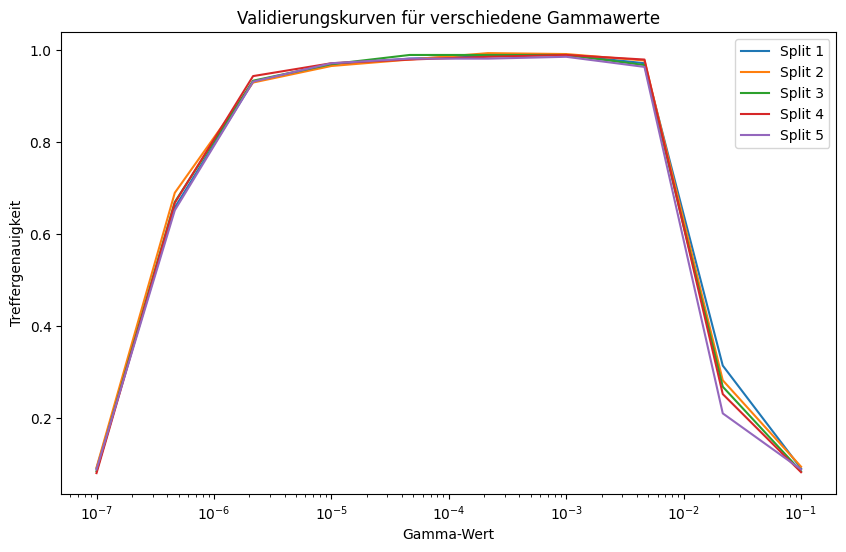

Der optimale Gammawert ist 0.001000 mit einer durchschnittlichen Testgenauigkeit von 0.989600.


In [4]:
# Definiere Parameter fuer die Gittersuche
C = 10
gammas = np.logspace(-7, -1, 10)

# Erzeuge einen ShuffleSplit-Splitter mit 5 Splits und einer Testdatensatzgroesse von 500
shuffle_splitter = ShuffleSplit(n_splits=5, test_size=500, random_state=42)

# Initialisiere Arrays fuer die Ergebnisse
train_scores = np.zeros((len(gammas), shuffle_splitter.get_n_splits()))
test_scores = np.zeros((len(gammas), shuffle_splitter.get_n_splits()))

# Iteriere ueber verschiedene Gammawerte
for gamma_index, gamma in enumerate(gammas):
    # Definiere SVM-Modell mit dem aktuellen Gammawert
    svm_model = SVC(gamma=gamma, C=C)

    # Iteriere ueber die Splits
    for split_index, (train_index, test_index) in enumerate(shuffle_splitter.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainiere das SVM-Modell und berechne die Treffergenauigkeit
        svm_model.fit(X_train, y_train)
        train_scores[gamma_index, split_index] = svm_model.score(X_train, y_train)
        test_scores[gamma_index, split_index] = svm_model.score(X_test, y_test)

# Plotte die Validierungskurven fuer jeden Split
plt.figure(figsize=(10, 6))
for split_index in range(shuffle_splitter.get_n_splits()):
    plt.plot(gammas, test_scores[:, split_index], label=f'Split {split_index + 1}')

plt.xscale('log')
plt.title('Validierungskurven für verschiedene Gammawerte')
plt.xlabel('Gamma-Wert')
plt.ylabel('Treffergenauigkeit')
plt.legend()
plt.show()

# Finde den Gammawert mit der hoechsten durchschnittlichen Testgenauigkeit
mean_test_scores = np.mean(test_scores, axis=1)
best_gamma_index = np.argmax(mean_test_scores)
best_gamma = gammas[best_gamma_index]
best_mean_test_score = mean_test_scores[best_gamma_index]

print(f'Der optimale Gammawert ist {best_gamma:.6f} mit einer durchschnittlichen Testgenauigkeit von {best_mean_test_score:.6f}.')

d) Die Gittersuche lässt sich ebenfalls automatisieren mit sklearn.model_selection. GridSearchCV(). Wir erzeugen dazu ein Gitter aus Wertepaaren für gamma und C mit dem Dictionary

svc_params = {
    'C': np.logspace(-1, 2, 4),
    'gamma': np.logspace(-4, 0, 5), 
}

Dieses Gitter kann direkt an GridSearchCV() als Argument param_grid übergeben werden. Da diese Prozedur sehr zeitaufwendig ist, verkleinern wie den Datensatz auf die ersten 500 Beispiele. Führen Sie für diesen verkleinerten Datensatz eine Gittersuche mithilfe von GridSearchCV() und jeweils 3 Splits (Parameter cv) durch. Den besten Parametersatz erhalten Sie mit GridSearchCV().best_params_, die höchste Treffergenauigkeit mit GridSearchCV().best_score_. Ausführliche Informationen zu jedem Parameterwertepaar stehen in dem Dictionary GridSearchCV().cv_results_. Nach der Gittersuche führt GridSearchCV() noch ein Training auf dem gesamten Datensatz mit den besten Parametern durch, so dass die resultierende Maschine sofort eingesetzt werden kann. Testen Sie diese Maschine auf den übriggebliebenen Daten.

In [5]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Definiere das Gitter für die Gittersuche
svc_params = {
    'C': np.logspace(-1, 2, 4),
    'gamma': np.logspace(-4, 0, 5),
}

# Teile den Datensatz in Trainings- und Testdaten auf, erste 500 Beispiele
X, y = digits.data[:500], digits.target[:500]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Definiere das SVM-Modell
svm_model = SVC()

# Erzeuge das GridSearchCV-Objekt
grid_search = GridSearchCV(svm_model, svc_params, cv=3)

# Fuehre die Gittersuche durch
grid_search.fit(X_train, y_train)

# Zeige den besten Parametersatz und die hoechste Treffergenauigkeit
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Beste Parameter: {best_params}')
print(f'Hoechste Treffergenauigkeit: {best_score:.6f}')

# Teste das beste Modell auf den uebriggebliebenen Daten (Testdatensatz)
test_accuracy = grid_search.score(X_test, y_test)
print(f'Testdatensatz Treffergenauigkeit des besten Modells: {test_accuracy:.6f}')

Beste Parameter: {'C': 10.0, 'gamma': 0.001}
Hoechste Treffergenauigkeit: 0.981333
Testdatensatz Treffergenauigkeit des besten Modells: 0.992000


In [6]:
%version_information

Software versions
Python 3.12.0 64bit [MSC v.1935 64 bit (AMD64)]
IPython 8.16.1
OS Windows 10 10.0.19045 SP0
Wed Nov 22 20:17:52 2023 Mitteleuropäische Zeit